<a href="https://colab.research.google.com/github/danjethh/steg_analysis/blob/main/revised_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00


In [3]:
import numpy as np
from scipy import ndimage
from scipy.stats import pearsonr
import pywt
from skimage.io import imread
import os
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

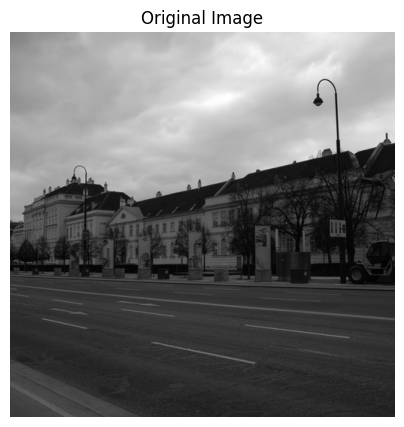

Image Metadata:
Format: PPM
Size: (512, 512)
Mode: L


In [4]:

# Step 1: Show the Picture with Its Image Description and Metadata
# Load an image from a URL
image_url = "https://raw.githubusercontent.com/Sourish1997/steganalysis/master/bossbase_sample/14.pgm"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display image metadata
print("Image Metadata:")
print(f"Format: {img.format}")
print(f"Size: {img.size}")
print(f"Mode: {img.mode}")

Pixel Number Array:
[[128 128 126 ... 190 190 189]
 [128 128 128 ... 190 190 190]
 [128 129 129 ... 191 190 190]
 ...
 [ 57  57  59 ...  46  40  33]
 [ 59  57  58 ...  42  42  34]
 [ 60  55  57 ...  36  36  38]]


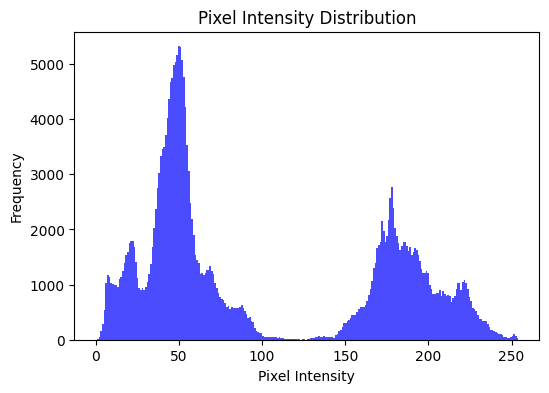

In [5]:
# Step 2: Show the Pixel Number Array and Pixel Intensity Distribution
# Convert image to grayscale array
img_array = np.array(img)

# Display the pixel array
print("Pixel Number Array:")
print(img_array)

# Plotting pixel intensity histogram
plt.figure(figsize=(6, 4))
plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Bit Representation of Pixel Array:
[['10000000' '10000000' '01111110' ... '10111110' '10111110' '10111101']
 ['10000000' '10000000' '10000000' ... '10111110' '10111110' '10111110']
 ['10000000' '10000001' '10000001' ... '10111111' '10111110' '10111110']
 ...
 ['00111001' '00111001' '00111011' ... '00101110' '00101000' '00100001']
 ['00111011' '00111001' '00111010' ... '00101010' '00101010' '00100010']
 ['00111100' '00110111' '00111001' ... '00100100' '00100100' '00100110']]


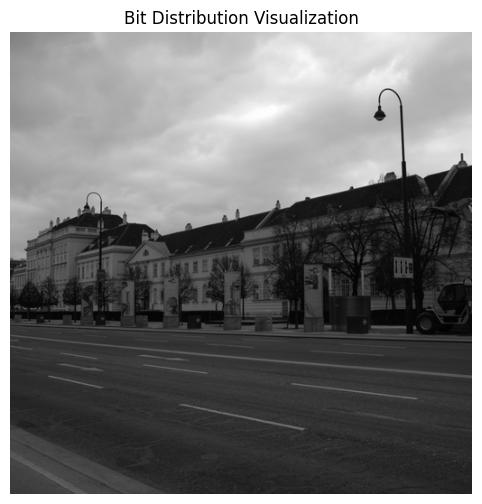

In [6]:
# Step 3: Show the Bit Distribution of the Image
# Display the bit representation of pixel values
bit_representation = np.vectorize(np.binary_repr)(img_array, width=8)
print("Bit Representation of Pixel Array:")
print(bit_representation)

# Visualizing the bit distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(np.array([[int(bit, 2) for bit in row] for row in bit_representation]), cmap='gray')
plt.title('Bit Distribution Visualization')
plt.axis('off')
plt.show()

Hidden Message: Secret
Message in Binary: 010100110110010101100011011100100110010101110100


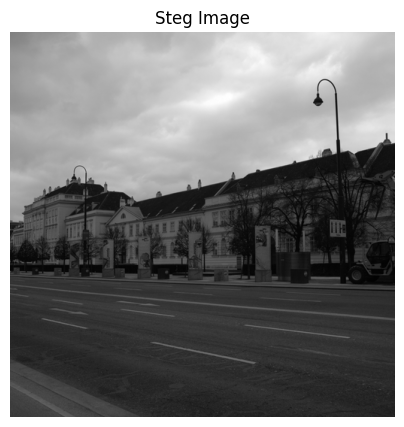

Bit Representation of Steg Image Pixel Array:
[['10000000' '10000001' '01111110' ... '10111110' '10111110' '10111101']
 ['10000000' '10000000' '10000000' ... '10111110' '10111110' '10111110']
 ['10000000' '10000001' '10000001' ... '10111111' '10111110' '10111110']
 ...
 ['00111001' '00111001' '00111011' ... '00101110' '00101000' '00100001']
 ['00111011' '00111001' '00111010' ... '00101010' '00101010' '00100010']
 ['00111100' '00110111' '00111001' ... '00100100' '00100100' '00100110']]


In [12]:
# Step 4: Manipulate the Image using LSB Replacement to Create a Stego Image
# Define a hidden message and embed it using LSB replacement
message = "Secret"
print(f"Hidden Message: {message}")

# Convert message to binary
message_bits = ''.join([format(ord(char), '08b') for char in message])
print(f"Message in Binary: {message_bits}")

# Function to embed the message into the image using LSB replacement
def embed_message(image_array, message_bits):
    flat_image = image_array.flatten()
    for i in range(len(message_bits)):
        flat_image[i] = (flat_image[i] & ~1) | int(message_bits[i])
    return flat_image.reshape(image_array.shape)

# Embed the message into the image
steg_image_array = embed_message(img_array, message_bits)

# Display the stego image
plt.figure(figsize=(5, 5))
plt.imshow(steg_image_array, cmap='gray')
plt.title('Steg Image')
plt.axis('off')
plt.show()

# Show the bit distribution of the stego image
steg_bit_representation = np.vectorize(np.binary_repr)(steg_image_array, width=8)
print("Bit Representation of Steg Image Pixel Array:")
print(steg_bit_representation)

In [1]:
# Bit Distribution Histogram for Stego Image
plt.figure(figsize=(6, 4))
plt.hist(steg_image_array.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Bit Distribution of Steg Image')
plt.xlabel('Bit Value')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Step 5: Show the Modified Bits of the Two Image Manipulated
# Visualize the differences in bits between the original and stego image
modified_bits = img_array ^ stego_image_array
print("Modified Bits Between Original and Stego Image:")
print(modified_bits)

plt.figure(figsize=(8, 6))
plt.imshow(modified_bits, cmap='gray')
plt.title('Modified Bits Visualization')
plt.axis('off')
plt.show()

In [ ]:
# Step 6: Show Histogram Distribution of Both Images Side by Side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(steg_image_array.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Stego Image Histogram')
plt.xlabel('Pixel Intensity')

plt.tight_layout()
plt.show()

In [ ]:
# Feature Extraction: Explain and Extract Features
print("\nWhat Are Features?\n")
print("Features are measurable properties or characteristics of an image that help in identifying patterns and enabling machine learning models to differentiate between different types of images. They could include pixel intensity, texture, edges, color histograms, or any derived values like statistical measures.")

# Define a function to extract features
def extract_features(image_array):
    print("\nStarting Feature Extraction...\n")
    features = []
    # Example 1: Simple Statistical Features
    mean_value = np.mean(image_array)
    std_dev = np.std(image_array)
    features.extend([mean_value, std_dev])
    print(f"Mean Value: {mean_value}, Standard Deviation: {std_dev}")

    # Example 2: Edge Detection Features
    edges = ndimage.sobel(image_array)
    edge_mean = np.mean(edges)
    edge_std = np.std(edges)
    features.extend([edge_mean, edge_std])
    print(f"Edge Mean: {edge_mean}, Edge Standard Deviation: {edge_std}")

    # Example 3: Wavelet Transform Features
    coeffs2 = pywt.dwt2(image_array, 'haar')
    LL, (LH, HL, HH) = coeffs2
    features.extend([np.mean(LL), np.std(LH), np.std(HL), np.std(HH)])
    print(f"Wavelet LL Mean: {np.mean(LL)}")
    print(f"Wavelet LH Std: {np.std(LH)}")
    print(f"Wavelet HL Std: {np.std(HL)}")
    print(f"Wavelet HH Std: {np.std(HH)}")

    # Example 4: Correlation Feature
    if image_array.shape[1] > 1:
        corr, _ = pearsonr(image_array[:, 0], image_array[:, 1])
        features.append(corr)
        print(f"Correlation Between Columns: {corr}")

    return features

# Extract and show features for both images
original_features = extract_features(img_array)
stego_features = extract_features(stego_image_array)

print("\nExtracted Features for Original Image:")
print(original_features)

print("\nExtracted Features for Stego Image:")
print(stego_features)